# COGS 118B - Project Proposal

# Project Description

You will design and execute a machine learning project. There are a few constraints on the nature of the allowed project. 
- The problem addressed will not be a "toy problem" or "common training students problem" like mtcars, iris, palmer penguins etc.
- The dataset will have >1k observations and >5 variables. I'd prefer more like >10k observations and >10 variables. A general rule is that if you have >100x more observations than variables, your solution will likely generalize a lot better. The goal of training an unsupervised machine learning model is to learn the underlying pattern in a dataset in order to generalize well to unseen data, so choosing a large dataset is very important.

- The project must include some elements of unsupervised learning, but you are welcome to include some supervised or other learning approaches as well.
- The project will include a model selection and/or feature selection component where you will be looking for the best setup to maximize the performance of your ML system.
- You will evaluate the performance of your ML system using more than one appropriate metric
- You will be writing a report describing and discussing these accomplishments


Feel free to delete this description section when you hand in your proposal.

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Pelé
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

You should have a strong idea of what dataset(s) will be used to accomplish this project. 

If you know what (some) of the data you will use, please give the following information for each dataset:
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc will be needed

If you don't yet know what your dataset(s) will be, you should describe what you desire in terms of the above bullets.

In [3]:
# imports
import pandas as pd
import numpy as np
import json
import gzip 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
# load in json file 
df = pd.read_json('goodreads_book_genres_initial.json', lines = True)

In [10]:
# load in csv file with first 200000 row 
user_df = pd.read_csv('goodreads_interactions.csv',nrows=200000)
user_df

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
199995,437,51332,0,0,0
199996,437,51329,0,0,0
199997,437,98589,0,0,0
199998,437,98588,0,0,0


In [12]:
# only include 800000 books
book_df = df.sample(800000, random_state=1)
book_df

,book_id,genres
1479845,6884978,{}
2032903,6070478,"{'history, historical fiction, biography': 8, ..."
1406890,6343285,{}
183904,17058517,{'non-fiction': 23}
425144,34284404,{}
...,...,...
686872,24840238,"{'non-fiction': 20, 'fiction': 3, 'history, hi..."
45306,32128623,{'children': 4}
1254359,35174758,"{'comics, graphic': 42}"
2183803,19166163,"{'fantasy, paranormal': 1, 'romance': 1}"


In [15]:
# clean the genres to list 
book_df['genres_lst'] = book_df['genres'].apply(lambda x: list(x.keys()))
book_df = book_df[book_df['genres_lst'].str.len() != 0]
book_df

,book_id,genres,genres_lst
2032903,6070478,"{'history, historical fiction, biography': 8, ...","[history, historical fiction, biography, child..."
183904,17058517,{'non-fiction': 23},[non-fiction]
1584276,6885606,"{'romance': 4, 'fiction': 1}","[romance, fiction]"
636742,10961964,"{'history, historical fiction, biography': 265...","[history, historical fiction, biography, roman..."
234337,260335,"{'non-fiction': 2, 'history, historical fictio...","[non-fiction, history, historical fiction, bio..."
...,...,...,...
686872,24840238,"{'non-fiction': 20, 'fiction': 3, 'history, hi...","[non-fiction, fiction, history, historical fic..."
45306,32128623,{'children': 4},[children]
1254359,35174758,"{'comics, graphic': 42}","[comics, graphic]"
2183803,19166163,"{'fantasy, paranormal': 1, 'romance': 1}","[fantasy, paranormal, romance]"


In [17]:
# merge book and users to merged_df
merged_df = user_df.merge(book_df, how = 'left', left_on = 'book_id', right_on = 'book_id').dropna()
merged_df['user_id'].value_counts()

user_id
5      946
14     858
211    637
427    517
270    482
      ... 
58       5
96       4
74       4
48       4
46       1
Name: count, Length: 437, dtype: int64

In [19]:
# check if there are any np.nan value left 
merged_df.isna().all()


user_id        False
book_id        False
is_read        False
rating         False
is_reviewed    False
genres         False
genres_lst     False
dtype: bool

In [32]:
merged_df.head()

,user_id,book_id,is_read,rating,is_reviewed,genres,genres_lst
6,0,942,1,5,0,"{'non-fiction': 199, 'children': 33}","[non-fiction, children]"
15,0,933,1,4,0,"{'fiction': 17490, 'history, historical fictio...","[fiction, history, historical fiction, biograp..."
17,0,931,1,5,0,"{'fiction': 17490, 'history, historical fictio...","[fiction, history, historical fiction, biograp..."
33,0,915,1,5,1,"{'mystery, thriller, crime': 273, 'fiction': 94}","[mystery, thriller, crime, fiction]"
35,0,913,0,0,1,"{'non-fiction': 1466, 'fiction': 26, 'history,...","[non-fiction, fiction, history, historical fic..."


In [20]:
# import ML packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

### K-means cluster

In [21]:
# One-hot encode the genres_lst columns (total unique 10 genres)
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_df['genres_lst'])
genres_encoded

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [22]:
# create df with encoded genres 
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
genres_df['ident'] = [i for i in range((genres_df).shape[0])]
genres_df.head()

,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,ident
0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,1,0,1,0,1
2,0,0,0,1,1,0,1,0,1,0,2
3,0,0,0,1,0,1,0,0,0,0,3
4,0,0,0,1,1,0,1,0,0,0,4


In [23]:
# create df with only useful features 
only_users = merged_df[['user_id', 'is_read', 'rating']]
only_users['ident'] = [i for i in range((only_users).shape[0])]
only_users.head()

/var/folders/hj/mryc47450d32cwgnvn7hrs3r0000gn/T/ipykernel_21161/3365376172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_users['ident'] = [i for i in range((only_users).shape[0])]


,user_id,is_read,rating,ident
6,0,1,5,0
15,0,1,4,1
17,0,1,5,2
33,0,1,5,3
35,0,0,0,4


In [24]:
# contains user and books info 
user_genres = only_users.merge(genres_df, how = 'right', left_on = 'ident', right_on = 'ident')
user_genres = user_genres.drop(['ident'], axis = 1)
user_genres

,user_id,is_read,rating,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,0,1,5,1,0,0,0,0,0,1,0,0,0
1,0,1,4,0,0,0,1,1,0,1,0,1,0
2,0,1,5,0,0,0,1,1,0,1,0,1,0
3,0,1,5,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29854,437,0,0,0,0,0,0,1,0,1,0,0,0
29855,437,0,0,0,0,0,0,1,0,0,0,0,0
29856,437,0,0,0,0,0,1,1,0,1,0,0,0
29857,437,0,0,0,0,0,1,1,0,1,0,0,0


In [33]:
# contains unique users with normalized genres, mean of rating, sum of is_reading over all the books they read 
user_df = user_genres.groupby('user_id').agg({**{'rating': 'mean', 
                                                      'is_read': 'sum'},
                                                   **{genre: 'sum' for genre in mlb.classes_}})

row_sums = user_df[mlb.classes_].sum(axis=1)
user_df[mlb.classes_] = user_df[mlb.classes_].div(row_sums, axis=0)
user_df = user_df.drop(['is_read'], axis = 1)
user_df = user_df.drop(['rating'], axis = 1)
user_df

,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
user_id,,,,,,,,,,
0,0.036364,0.027273,0.079545,0.259091,0.197727,0.072727,0.190909,0.025000,0.056818,0.054545
1,0.000000,0.000000,0.073171,0.146341,0.170732,0.146341,0.317073,0.000000,0.121951,0.024390
2,0.050000,0.083333,0.033333,0.216667,0.200000,0.033333,0.300000,0.033333,0.033333,0.016667
3,0.011494,0.000000,0.120690,0.229885,0.224138,0.028736,0.149425,0.126437,0.063218,0.045977
4,0.000000,0.000000,0.141732,0.244094,0.220472,0.023622,0.133858,0.188976,0.031496,0.015748
...,...,...,...,...,...,...,...,...,...,...
433,0.074890,0.022026,0.127753,0.229075,0.149780,0.083700,0.140969,0.017621,0.044053,0.110132
434,0.043796,0.058394,0.065693,0.218978,0.182482,0.094891,0.102190,0.087591,0.072993,0.072993
435,0.048352,0.050549,0.074725,0.197802,0.180220,0.074725,0.200000,0.052747,0.054945,0.065934


In [34]:
# create and fit kmeans 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(user_df)

/Users/primepi/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [35]:
# add label in clusters
user_df['cluster'] = kmeans.labels_

In [36]:
user_df

,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,cluster
user_id,,,,,,,,,,,
0,0.036364,0.027273,0.079545,0.259091,0.197727,0.072727,0.190909,0.025000,0.056818,0.054545,0
1,0.000000,0.000000,0.073171,0.146341,0.170732,0.146341,0.317073,0.000000,0.121951,0.024390,1
2,0.050000,0.083333,0.033333,0.216667,0.200000,0.033333,0.300000,0.033333,0.033333,0.016667,1
3,0.011494,0.000000,0.120690,0.229885,0.224138,0.028736,0.149425,0.126437,0.063218,0.045977,0
4,0.000000,0.000000,0.141732,0.244094,0.220472,0.023622,0.133858,0.188976,0.031496,0.015748,0
...,...,...,...,...,...,...,...,...,...,...,...
433,0.074890,0.022026,0.127753,0.229075,0.149780,0.083700,0.140969,0.017621,0.044053,0.110132,4
434,0.043796,0.058394,0.065693,0.218978,0.182482,0.094891,0.102190,0.087591,0.072993,0.072993,0
435,0.048352,0.050549,0.074725,0.197802,0.180220,0.074725,0.200000,0.052747,0.054945,0.065934,1


In [37]:
# eval matrix
silhouette_avg = silhouette_score(user_df, kmeans.labels_)
silhouette_avg

0.8991976284313122

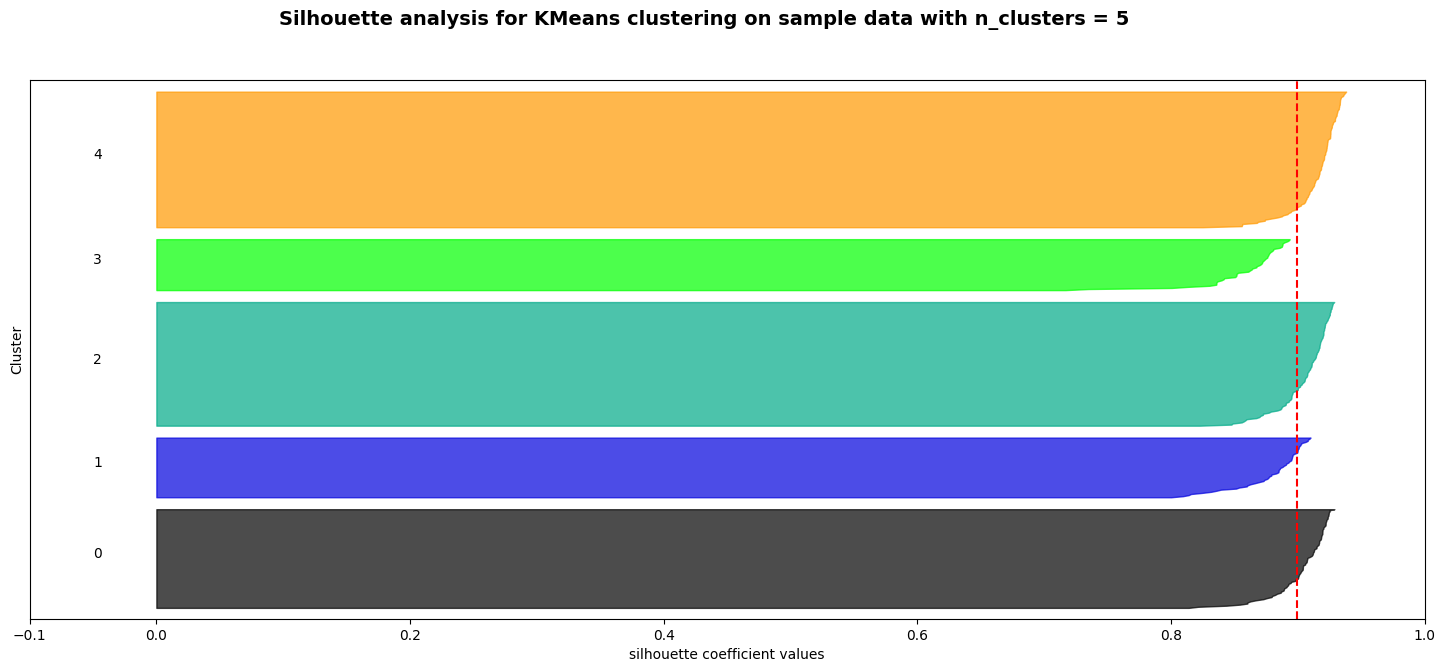

In [38]:
# graph silhouette
silhouette_avg = silhouette_score(user_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(user_df, kmeans.labels_)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

cluster_n = 5
ax1.set_xlim([-0.1, 1])
# The (5+1)*10 is for inserting blank space between silhouette
ax1.set_ylim([0, len(user_df) + (cluster_n + 1) * 10])

y_lower = 10

#5 clusters
for i in range(cluster_n):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / cluster_n)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  


ax1.set_xlabel("silhouette coefficient values")
ax1.set_ylabel("Cluster")

# Vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Clear the yaxis labels
ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Display the silhouette plot
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              f'with n_clusters = {cluster_n}'),
             fontsize=14, fontweight='bold')

plt.show()

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Why might your solution work? Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

we propose to build a unsuprivised machine learning model to recommend books to users in the following steps. Firstly, we obtain two data sets, ``goodreads_book_genres_initial.json`` and ``goodreads_interactions.csv``. Where the ``goodreads_book_genres_initial.json`` is a json format dataset that contains all the books and their genra, and ``goodreads_interactions.csv`` is a CSV format dataset that stores the information on how each user interactec with each book, such as whether they have read the entire book, whether they gave a review, and how did they rate the book. We will split these two datasets to train and test, 80/20 split. Then, we will merge the two dataset together so that we can know the interaction between each user and the genera of the books they read. In this step we will sum the fields of the user iteration with all the books and normalize those and create a new dataset. Afterthat, we will cluster the users using K means, we can first choose a random n and set k=n, then use silhouette analysis to evaulate the quality of our clustering. Finally, we will recommand book that one user has interation with to another user that does not have interaction with in the same cluster, and that completes our solution. To test our solution,we will use the test dataset that we left out earlier, we will ...

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination. Get creative!

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Replace this with something meaningful that is appropriate for your needs. It doesn't have to be something that fits this format.  It doesn't have to be set in stone... "no battle plan survives contact with the enemy". But you need a battle plan nonetheless, and you need to keep it updated so you understand what you are trying to accomplish, who's responsible for what, and what the expected due dates are for each item.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
